general todo, organize class, maybe subclass, some static methods
write documentation

## Import all the relevant Modules 

In [4]:
%matplotlib inline

# adding `Modules/` to the system path
#import sys
#sys.path.insert(0, './Modules/')

#TODO: Rename module shortcuts such as hb into something usefull after development
import Modules.Hubbard_Class as hb
import Modules.Widgets as w
import ipywidgets as widgets
import numpy as np

# Plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')
plt.rcParams.update({'font.size':16})

from ipywidgets import HBox, VBox
import functools

def close_widgets(DIR):
    """ Close all widgets `wi` and displays `di` in notebook directory `dir()`.
    """
    for i in range(100):
        if f"w{i}" in DIR:
            exec(f"w{i}.close()")
        if f"d{i}" in DIR:
            exec(f"d{i}.close()")
            
# adding `Modules/` to the system path
import sys
sys.path.insert(0, '../Modules/')

from Module_Widgets_and_Sliders import Text_Box, Save_Figure_Button, Click_Save_Figure, set_filename

%load_ext autoreload
%autoreload 2
#TODO rename one of the modules folders

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO: give a good description of the model we're looking at
## Introduction

The following are all markdown todos
* TODO: Check name of basis states
* TODO: Show how basis is created
* #TODO state that total number of basis states is ncr(n,s1) ncr (n,s2)
## The Fock Basis states 

In [2]:
h1 = hb.Hubbard()

In [ ]:
close_widgets(dir())
w1 = widgets.interactive(h1.show_basis, index=h1.basis_index, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

display(w1)

## Hopping Hamiltonian

Markdown Taks:
* TODO: possibly show the simple n=2 analytic calculation for the hubbard molecule in occupation number basis
* TODO: Show the operator nn, na, nb etc


* TODO: Show the operator nn, na, nb etc, show S_a. S_b, S^2

* TODO: Do not show hopping, boring!

In the Widget below one can play around with the number of sites $n$, spin up and spin down states, as well as the interaction strength $U$ and the hopping amplitude $t$ to explore the hamiltonian $H$. Note that only for $n \leq 4$ the complete matrix can be fully displayed.

In [ ]:
#close previous widget to prevent slowing down calculations
close_widgets(dir())

np.set_printoptions(linewidth=150) #set output length, default=75
w2 = widgets.interactive(h1.Show_H, u=h1.u, t=h1.t, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);
display(w2)

# Calculate Eigenenergies 
TODO: for Hu in widget (copy paste)
TODO: for Ht with widget (copy paste) 
TODO: for Ht+Hu widget

In [ ]:
close_widgets(dir())
w3 = widgets.interactive(h1.Plot_Eigvals_Hu, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w3, name_widget=filename, output=h1.out, path=""))
 
d3 = HBox([Save_Figure_Button, filename, h1.out])
display(d3)
display(w3)

In [ ]:
import scipy as sp
_H = [sp.sparse.csr_matrix(h1.H(0.01, 1))]
eig_vecs = np.array([sp.sparse.linalg.eigsh(h, k=4, which="SA")[0] for h in _H]).reshape(4, -1)
eig_vecs
#np.einsum("ij, ji->i", eig_vecs, h1.Op_nn_mean @ eig_vecs.T).sum() / 4

In [ ]:
close_widgets(dir())
w4 = widgets.interactive(h1.Plot_Eigvals_Ht, t=h1.t_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w4, name_widget=filename, output=h1.out, path=""))

d4 = HBox([Save_Figure_Button, filename, h1.out])
display(d4)
display(w4)

In [ ]:
close_widgets(dir())
w5 = widgets.interactive(h1.Plot_Eigvals_H, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w5, name_widget=filename, output=h1.out, path=""))

d5 = HBox([Save_Figure_Button, filename, h1.out])
display(d5)
display(w5)

# Plot Expectation values
TODO: nn_mean, Sz, Sz fluctuations = Sz^2 - <Sz>^2, <n_up>, <n_down>, <Sz(i)Sz(j)>

In [65]:
close_widgets(dir())
x = lambda u,  **kwargs: u
w99 = widgets.interactive(x, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down)
w99

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='$t=$', max=5.0,…

In [ ]:
close_widgets(dir())
w6 = widgets.interactive(h1.Plot_ExpVal_nn, {"manual": True}, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w6, name_widget=filename, output=h1.out, path=""))

d6 = HBox([Save_Figure_Button, filename, h1.out])
display(d6)
display(w6)

In [10]:
close_widgets(dir())
w7 = widgets.interactive(h1.Plot_ExpVal_Sz, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w7, name_widget=filename, output=h1.out, path=""))

d7 = HBox([Save_Figure_Button, filename, h1.out])
display(d7)
display(w7)

interactive(children=(FloatRangeSlider(value=(0.0, 9.9), continuous_update=False, description='$U=$', layout=L…

In [5]:
close_widgets(dir())
w8 = widgets.interactive(h1.Plot_ExpVal_SzSz, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w8, name_widget=filename, output=h1.out, path=""))

d8 = HBox([Save_Figure_Button, filename, h1.out])
display(d8)
display(w8)

interactive(children=(FloatRangeSlider(value=(0.0, 7.0), continuous_update=False, description='$U=$', layout=L…

In [31]:
close_widgets(dir())
w9 = widgets.interactive(h1.Plot_Local_Chi, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w9, name_widget=filename, output=h1.out, path=""))

d9 = HBox([Save_Figure_Button, filename, h1.out])
display(d9)
display(w9)

interactive(children=(FloatRangeSlider(value=(0.0, 40.0), continuous_update=False, description='$U=$', layout=…

In [ ]:
close_widgets(dir())
w10 = widgets.interactive(h1.Plot_Chi_Staggered, u=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down);

filename = set_filename("Hubbard.pdf")
Save_Figure_Button.on_click(functools.partial(Click_Save_Figure, widget=w10, name_widget=filename, output=h1.out, path=""))

d10 = HBox([Save_Figure_Button, filename, h1.out])
display(d10)
display(w10)

In [66]:
close_widgets(dir())
x = lambda u,  **kwargs: u
w99 = widgets.interactive(x, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down)
w99

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='$t=$', max=5.0,…

In [ ]:
plt.plot(a)

In [137]:
S = np.sum([(-1)**i * h1.Op_Sz(i) for i in np.arange(h1.n.value)], axis=0)

In [ ]:
plt.plot(np.round(h1.Exp_Val_0(h1.Op_Sz(1)@h1.Op_Sz(1)),4))
plt.plot(np.round(1 - 2*h1.Exp_Val_0(h1.Op_nn_mean),4), label="nn")
plt.legend()

In [ ]:
np.round(h1.DoubleSiteAvg,2)

In [ ]:
h1.Exp_Val_0(h1.Op_nn_mean).shape

In [ ]:
h1.diag(0)

In [ ]:
h1.Op_nn

In [ ]:
np.diag(h1.Op_n_up(0)* h1.Op_n_down(0))

In [ ]:
vars()

4.68 ms ± 43.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


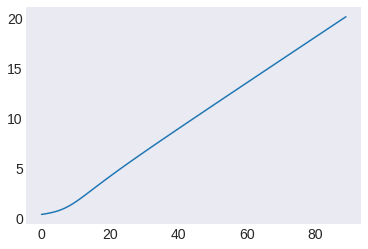

In [172]:
plt.plot(h1.Chi);

In [160]:
close_widgets(dir())
x = lambda u,  **kwargs: u
w99 = widgets.interactive(x, u=h1.t_range, t=h1.u_range, n=h1.n, s_up=h1.s_up, s_down=h1.s_down)
w99

interactive(children=(FloatRangeSlider(value=(0.0, 1.0), continuous_update=False, description='$t=$', max=5.0,…

In [ ]:
TODO: document Chi, implement staggered Chi, document SChi, implement plotting of both